<a href="https://colab.research.google.com/github/stewartjollymore/NLP_CourseUCSD/blob/main/Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
from google.colab import drive
drive.mount('/content/drive/')
# At this stage Colab will try to access your Google Drive account.
# Enter the password generated by Google Drive.


Mounted at /content/drive/


In [ ]:
import os
os.chdir("drive/My Drive/")

In [ ]:
path = "GoogleNews-vectors-negative300.bin"
# Provide the complete path of the ‘GoogleNews’ file
# stored in your Google Drive account.
model = KeyedVectors.load_word2vec_format(path, binary=True, limit=200000)

Problem #1

In [ ]:
vec1 = model["Marie_Curie"] - model["physics"] + model["politics"]
model.most_similar([vec1])

[('Marie_Curie', 0.6391899585723877),
 ('politics', 0.45687681436538696),
 ('Sue_Ryder', 0.4075208604335785),
 ('Breakthrough_Breast_Cancer', 0.37573352456092834),
 ('Margaret_Thatcher', 0.3684638738632202),
 ('Marie_Curie_Cancer', 0.3580324947834015),
 ('politicians', 0.34992516040802),
 ('Breast_Cancer_Care', 0.34824055433273315),
 ('Mrs_Thatcher', 0.3457459509372711),
 ('politicans', 0.3389205038547516)]

In [ ]:
vec2 = model["Cowboys"] - model["Dallas"] + model["Miami"]
model.most_similar([vec2])

[('Cowboys', 0.7327904105186462),
 ('Dolphins', 0.7073556780815125),
 ('Miami_Dolphins', 0.6461875438690186),
 ('Broncos', 0.6419293284416199),
 ('Seminoles', 0.6188381910324097),
 ('Gators', 0.6109528541564941),
 ('Hokies', 0.592700719833374),
 ('Dallas_Cowboys', 0.5866430997848511),
 ('Sooners', 0.586640477180481),
 ('Cleveland_Browns', 0.5844414234161377)]

In [ ]:
vec3 = model["Sacramento"] - model["California"] + model["Colorado"]
model.most_similar([vec3])

[('Denver', 0.7687566876411438),
 ('Colorado', 0.7621335983276367),
 ('Sacramento', 0.7206397652626038),
 ('Grand_Junction', 0.6696534752845764),
 ('Fort_Collins', 0.6669073104858398),
 ('Boulder', 0.6501880288124084),
 ('Colorado_Springs', 0.6477945446968079),
 ('Pueblo', 0.6256301403045654),
 ('Spokane', 0.6246552467346191),
 ('Gunnison', 0.6222272515296936)]

In [ ]:
vec4 = model["Cowboys"] - model["Dallas"] + model["San_Francisco"]
model.most_similar([vec4])

[('Cowboys', 0.71146559715271),
 ('Giants', 0.6826241612434387),
 ('Niners', 0.6466032266616821),
 ('##ers', 0.643872857093811),
 ('San_Francisco_##ers', 0.6088259816169739),
 ('Oakland_Raiders', 0.6043734550476074),
 ('Broncos', 0.5943415760993958),
 ('Raiders', 0.5565467476844788),
 ('Seahawks', 0.5484771728515625),
 ('Dallas_Cowboys', 0.5368008017539978)]

Problem #2

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

words1 = ['beautiful', "gorgeous", "dazzling", "splendid", "magnificent", "ugly"]
words1_vec = model[words1]


simMatrix = cosine_similarity(words1_vec, words1_vec)
print("The cosine similarity between beautiful and gorgeous is", simMatrix[0][1])
print()
print("The cosine similarity between beautiful and dazzling is", simMatrix[0][2])
print()
print("The cosine similarity between beautiful and splendid is", simMatrix[0][3])
print()
print("The cosine similarity between beautiful and magnificent is", simMatrix[0][4])
print()
print("The cosine similarity between beautiful and ugly is", simMatrix[0][5])

The cosine similarity between beautiful and gorgeous is 0.8353003

The cosine similarity between beautiful and dazzling is 0.47949678

The cosine similarity between beautiful and splendid is 0.5533437

The cosine similarity between beautiful and magnificent is 0.65914047

The cosine similarity between beautiful and ugly is 0.3344436


Problem #3

In [ ]:
import numpy as np

words2 = ["False", "fake", "fraudulent", "counterfeit", "spurious", "true"]
words2_vec = model[words2]


simMatrix2 = cosine_similarity(words2_vec, words2_vec)
(simMatrix2.sum(1)-1)/(simMatrix2.shape[1]-1)

array([0.3181141 , 0.45435843, 0.40518808, 0.36029965, 0.366558  ,
       0.24273667], dtype=float32)

Above I computed the average cosine similarity between all the words, then took the average across each row (*since this is a symetirc matrix you could do rows or columns*) ignoring the diagnoal (since they are NOT all 1 there is added noise) thereby accounting only for the similarites of the **OTHER** words.  I say the **true** does not belong, though it could be argued that there are a few differing clusters of these words given the averages are not that high.

Problem #4

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
embed = hub.load("https://tfhub.dev/google/Wiki-words-250-with-normalization/2")

In [ ]:
words4 = ["Coke", "Pepsi", "7Up", "Sprite", "Coca-Cola"]
words4_vec = embed(words4)

simMatrix3 = cosine_similarity(words4_vec, words4_vec)
simMatrix3

array([[0.99999976, 0.62521577, 0.5146611 , 0.50170887, 0.64903426],
       [0.62521577, 1.0000001 , 0.6818692 , 0.63720137, 0.893294  ],
       [0.5146611 , 0.6818692 , 1.0000001 , 0.5885447 , 0.7191731 ],
       [0.50170887, 0.63720137, 0.5885447 , 0.9999998 , 0.6301661 ],
       [0.64903426, 0.893294  , 0.7191731 , 0.6301661 , 0.9999999 ]],
      dtype=float32)

Above you will see I did add some other non-cola soda brand names in there to see what the reults might be. I found it interesting the Sprite is moresimilar to Pepsi than it is to Coke but closer to Coca-Cola than Coke (Coca-Cola is the producer of Sprite).  Pretty interesting stuff here.

Problem #5

In [ ]:
import numpy as np
import pandas as pd

text = "data science professionals have promising career path"

In [ ]:
words = []
for word in text.split(' '):
  words.append(word)

#words = sorted(set(words))
print(words)
print('Total words = ', len(words))

['data', 'science', 'professionals', 'have', 'promising', 'career', 'path']
Total words =  7


In [ ]:
WINDOW_SIZE = 1
word2int = {}

for i,word in enumerate(words):
  word2int[word] = i

skipNgram_data = []

for idx, word in enumerate(words):
  for neighbor in words[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(words)) + 1]:
    if neighbor != word:
      skipNgram_data.append([word, neighbor])

skipNgram_df = pd.DataFrame(skipNgram_data, columns = ['input', 'label'])
print(skipNgram_df)

            input          label
0            data        science
1         science           data
2         science  professionals
3   professionals        science
4   professionals           have
5            have  professionals
6            have      promising
7       promising           have
8       promising         career
9          career      promising
10         career           path
11           path         career


In [ ]:
WINDOW_SIZE = 2
word2int = {}

for i,word in enumerate(words):
  word2int[word] = i

skipNgram_data = []

for idx, word in enumerate(words):
  for neighbor in words[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(words)) + 1]:
    if neighbor != word:
      skipNgram_data.append([word, neighbor])

skipNgram_df = pd.DataFrame(skipNgram_data, columns = ['input', 'label'])
print(skipNgram_df)

            input          label
0            data        science
1            data  professionals
2         science           data
3         science  professionals
4         science           have
5   professionals           data
6   professionals        science
7   professionals           have
8   professionals      promising
9            have        science
10           have  professionals
11           have      promising
12           have         career
13      promising  professionals
14      promising           have
15      promising         career
16      promising           path
17         career           have
18         career      promising
19         career           path
20           path      promising
21           path         career


In [ ]:
WINDOW_SIZE = 3
word2int = {}

for i,word in enumerate(words):
  word2int[word] = i

skipNgram_data = []

for idx, word in enumerate(words):
  for neighbor in words[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(words)) + 1]:
    if neighbor != word:
      skipNgram_data.append([word, neighbor])

skipNgram_df = pd.DataFrame(skipNgram_data, columns = ['input', 'label'])
print(skipNgram_df)

            input          label
0            data        science
1            data  professionals
2            data           have
3         science           data
4         science  professionals
5         science           have
6         science      promising
7   professionals           data
8   professionals        science
9   professionals           have
10  professionals      promising
11  professionals         career
12           have           data
13           have        science
14           have  professionals
15           have      promising
16           have         career
17           have           path
18      promising        science
19      promising  professionals
20      promising           have
21      promising         career
22      promising           path
23         career  professionals
24         career           have
25         career      promising
26         career           path
27           path           have
28           path      promising
29        

Problem #6

In [70]:
words = []
for word in text.split(' '):
  words.append(word)

#words = sorted(set(words))
#print(words)
#print('Total words = ', len(words))

WINDOW_SIZE = 2
word2int = {}

#words = sorted(set(words))

word_sort = sorted(set(words))
for i,word in enumerate(word_sort):
  word2int[word] = i


skipNgram_data = []

for idx, word in enumerate(words):
  for neighbor in words[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(words)) + 1]:
    if neighbor != word:
      skipNgram_data.append([word, neighbor])

skipNgram_df = pd.DataFrame(skipNgram_data, columns = ['input', 'label'])

ONE_HOT_DIM = len(words)

def to_one_hot_encoding(data_point_index):
  one_hot_encoding = np.zeros(ONE_HOT_DIM)
  one_hot_encoding[data_point_index] = 1
  return one_hot_encoding

X = []
Y = []

for x, y in zip(skipNgram_df['input'], skipNgram_df['label']):
  X.append(to_one_hot_encoding(word2int[x]))
  Y.append(to_one_hot_encoding(word2int[y]))

print(word2int)
print()
print("word size", WINDOW_SIZE)
print("number of entries", len(skipNgram_df))
print(skipNgram_df)

{'career': 0, 'data': 1, 'have': 2, 'path': 3, 'professionals': 4, 'promising': 5, 'science': 6}

word size 2
number of entries 22
            input          label
0            data        science
1            data  professionals
2         science           data
3         science  professionals
4         science           have
5   professionals           data
6   professionals        science
7   professionals           have
8   professionals      promising
9            have        science
10           have  professionals
11           have      promising
12           have         career
13      promising  professionals
14      promising           have
15      promising         career
16      promising           path
17         career           have
18         career      promising
19         career           path
20           path      promising
21           path         career


In [71]:
X

[array([0., 1., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.])]

In [72]:
Y

[array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 0., 1.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.])]

Problem #7

In [91]:
text = ["I like deep learning",
          "I like NLP",
          "I enjoy flying"]

words = []
for sent in text:
  for word in sent.split(' '):
   words.append(word)

#words = sorted(set(words))
#print(words)
#print('Total words = ', len(words))

WINDOW_SIZE = 2
word2int = {}

#words = sorted(set(words))

word_sort = sorted(set(words))
for i,word in enumerate(word_sort):
  word2int[word] = i

sentences = []
for sentence in text:
  sentences.append(sentence.split())



skipNgram_data = []
for sentence in sentences:
  for idx, word in enumerate(sentence):
    for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1]:
      if neighbor != word:
        skipNgram_data.append([word, neighbor])

skipNgram_df = pd.DataFrame(skipNgram_data, columns = ['input', 'label'])

ONE_HOT_DIM = len(words)

def to_one_hot_encoding(data_point_index):
  one_hot_encoding = np.zeros(ONE_HOT_DIM)
  one_hot_encoding[data_point_index] = 1
  return one_hot_encoding

X = []
Y = []

for x, y in zip(skipNgram_df['input'], skipNgram_df['label']):
  X.append(to_one_hot_encoding(word2int[x]))
  Y.append(to_one_hot_encoding(word2int[y]))


In [103]:
import keras
from keras.models import Sequential
from keras.layers import Dense

X_train = np.asarray(X)
Y_train = np.asarray(Y)

print(X_train.shape)
print(Y_train.shape)

model = Sequential()
model.add(Dense(2, input_dim = X_train.shape[1], activation = 'linear'))
model.add(Dense(Y_train.shape[1], activation = "softmax"))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

model.summary()

(22, 10)
(22, 10)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 22        
                                                                 
 dense_7 (Dense)             (None, 10)                30        
                                                                 
Total params: 52 (208.00 Byte)
Trainable params: 52 (208.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [117]:
epochs = 200000

hist = model.fit(X_train, Y_train, verbose=0,epochs=epochs)

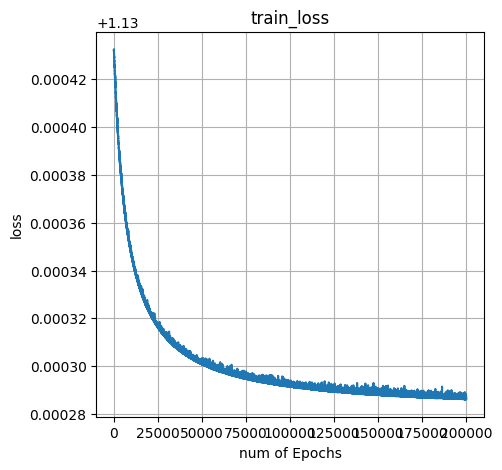

In [118]:
import matplotlib.pyplot as plt

train_loss = hist.history['loss']
xc = range(epochs)
plt.plot(xc, train_loss)

plt.figure(1, figsize=(7,5))
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss')
plt.grid(True)

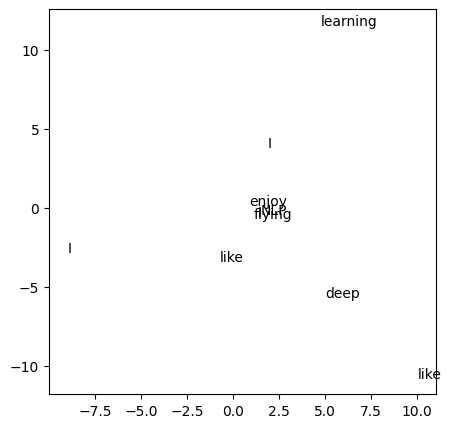

In [119]:
for layerNum, layer in enumerate(model.layers):
  weights = layer.get_weights()[0]
  biases = layer.get_weights()[1]
  break


word2vec = weights + biases

w2v_df = pd.DataFrame(word2vec, columns = ["x1", "x2"])
w2v_df['word'] = words
w2v_df = w2v_df[["word", "x1", "x2"]]

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
  ax.annotate(word, (x1, x2))

PADDING = 1.0
x_axis_min = np.amin(word2vec, axis=0)[0] - PADDING
y_axis_min = np.amin(word2vec, axis=0)[1] - PADDING
x_axis_max = np.amax(word2vec, axis=0)[0] + PADDING
y_axis_max = np.amax(word2vec, axis=0)[1] + PADDING

plt.xlim(x_axis_min, x_axis_max)
plt.ylim(y_axis_min, y_axis_max)
plt.rcParams["figure.figsize"] = (5,5)

plt.show()